In [8]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score
from scipy.sparse import csr_matrix'
from sklearn.feature_extraction.text import TfidfTransformer
import html
import re

def process(message):
    nopunc = [char for char in message if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    return ' '.join(clean)

def clean_tweet(tweet):
    # Unescape HTML entities (e.g., &amp; -> &, &#128536; -> emoji)
    tweet = html.unescape(tweet)
    # Remove mentions (@username)
    tweet = re.sub(r'@\w+', '', tweet)
    # Remove hashtags (#hashtag)
    tweet = re.sub(r'#\w+', '', tweet)
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet)
    # Remove emojis and non-ASCII characters
    tweet = tweet.encode('ascii', 'ignore').decode('ascii')
    # Remove special characters, punctuation (except sentence enders), and digits
    tweet = re.sub(r'[^A-Za-z\s]', '', tweet)
    # Collapse multiple spaces into one
    tweet = re.sub(r'\s+', ' ', tweet).strip()
    return tweet

porter = nltk.PorterStemmer()
def stem(message):
    stemmedArr = [porter.stem(term) for term in message.split(" ")]
    return ' '.join(stemmedArr)

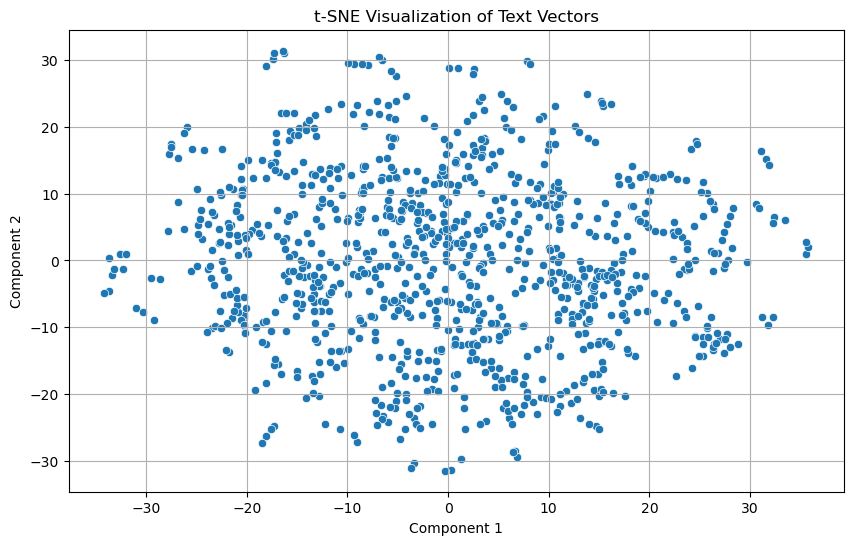

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import pandas as pd

# Example dataset

X = pd.read_csv("labeled_data.csv")['tweet']
X = X.apply(process)
X = X.apply(clean_tweet)
X = X.apply(stem)
# Step 1: Vectorize the texts
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X[:1000])

# Step 2: Reduce dimensions with t-SNE
tsne = TSNE(n_components=3, random_state=42, perplexity=5)
X_2d = tsne.fit_transform(X.toarray())

# Step 3: Visualize
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1])

# Annotate points

plt.title("t-SNE Visualization of Text Vectors")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()
